# **2.1 Unsupervised Learning Algorithms**

# Clustering with PCA-Reduced Data

In this part of the exercise, I use Principal Component Analysis (PCA) to reduce the weather data to its most essential dimensions. The goal is to see whether clustering the reduced dataset produces clearer groupings among weather stations and variables. By running hierarchical clustering on this smaller, simplified dataset, I can compare the results to the full dataset and explore whether any clusters align with ClimateWins’ “pleasant weather” labels.

## Table of Contents  
- [1. Import Libraries](#1-import-libraries)  
- [2. Load Data](#2-load-data)
- [3. Wrangle Data](#3-wrangle-data)    
- [4. Scale Data](#4-scale-data)  
- [5. Clustering with Dendrograms](#5-clustering-with-dendrograms)
  - Scaled Data
    - Single Linkage
    - Complete Linkage
    - Average Linkage
    - Ward Method
  - Unscaled Data
    - Single Linkage
    - Complete Linkage
    - Average Linkage
    - Ward Method 
- [6. Principle Components Analysis (PCA)](#6-principle-components-analysis-pca)    

## 1 Import Libraries

In this step, I load the Python packages needed for data preparation, dimensionality reduction, and clustering:

- `pandas` and `numpy` for data handling and numerical operations
- `seaborn` and `matplotlib` (plus ticker and figure) for creating clear visualisations
- `os` and `operator` for managing file paths and utility operations
- `StandardScaler from sklearn.preprocessing` for scaling features before PCA and clustering
- `PCA` from `sklearn.decomposition` to reduce the dataset to its most informative dimensions
- `linkage`, `dendrogram`, and `fcluster` from `scipy.cluster.hierarchy` for performing hierarchical clustering and generating dendrograms

These libraries provide all the tools needed to prepare, reduce, cluster, and visualise the weather data efficiently.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

## 2. Load Data

In this step, I set the file path and loaded two datasets into pandas: the full scaled European weather dataset and the pleasant weather dataset. Checking their shapes confirmed the data imported correctly. Having both datasets on hand allows me to perform clustering on the weather data and then compare the resulting clusters with the pleasant weather labels to identify any meaningful patterns.

In [2]:
# Create a path to where my data is stored
path = r'/Users/yaseminmustafa/Desktop/CareerFoundry/Specialisation'

In [3]:
# Read in the European weather data
climate = pd.read_csv(os.path.join(path, 'Achievement 1', '1.2', '[DATASET]_scaled.csv'))
climate

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [4]:
# Check shape
climate.shape

(22950, 171)

In [5]:
# Read in the pleasant weather data
pleasant_weather = pd.read_csv(os.path.join(path, 'Achievement 1', '1.4', 'pleasant_weather_answers.csv'))
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Check shape
pleasant_weather.shape

(22950, 16)

## 3. Data Wrangling

In this step, I filtered the full weather dataset to include only records from the year 2010. This allows me to focus the clustering analysis on a single year, which speeds up computations and makes the resulting dendrograms easier to interpret.

In [7]:
# Reducing dataset to 2010
climate2010 = climate[climate['DATE'].astype(str).str.startswith('2010')] #<-----INSERT YEAR HERE
climate2010

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,18263,20100101,1,1.076130,0.245067,1.548792,-3.288021,-1.251420,0.676766,-0.179228,...,-2.897272,-0.363113,-0.199725,-0.829990,-0.490810,-0.024706,0.762612,-2.711082,-2.596636,-2.448957
18264,18264,20100102,1,-1.001953,1.200556,-0.167609,0.196744,-0.821838,-0.445514,0.319230,...,-2.897272,-0.081896,0.499440,-0.806427,-0.490810,-0.024706,0.762612,-2.981462,-3.389134,-2.103861
18265,18265,20100103,1,-1.001953,-0.573924,-0.077273,0.701118,-0.789619,-0.445514,-0.179228,...,-1.057093,-1.628588,0.499440,-0.912459,-0.005560,-0.024706,-0.558963,-3.071588,-3.279824,-2.420199
18266,18266,20100104,1,-0.170720,-1.529413,0.645423,-0.170073,-0.929233,-0.445514,-0.179228,...,-2.283879,-2.191022,0.713851,-0.771082,0.112794,-0.024706,0.912791,-2.110239,-1.804137,-2.794053
18267,18267,20100105,1,0.660514,-0.983419,0.193738,-1.637343,-0.875535,-0.365351,-0.179228,...,-1.057093,-0.644330,-0.237013,-0.806427,-0.384292,-0.024706,0.372147,-2.530829,-2.350688,-2.333925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18623,18623,20101227,12,0.660514,-0.846921,0.374412,1.251344,-0.961452,-0.445514,7.297641,...,-0.443701,-0.081896,-0.003958,-1.195214,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.407141
18624,18624,20101228,12,1.076130,0.518064,0.916434,0.701118,-1.208462,-0.285188,6.300726,...,-0.443701,-0.081896,-0.003958,-1.195214,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.493415
18625,18625,20101229,12,1.076130,-0.710422,1.910140,0.792822,-1.229941,-0.445514,5.802268,...,-0.443701,-0.081896,-0.003958,-1.089181,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.608447
18626,18626,20101230,12,1.076130,-1.529413,2.181150,0.945663,-1.305118,-0.445514,3.808436,...,-0.443701,-0.081896,-0.003958,-1.053837,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.522173


## 4. Scaling Data

In this step, I scaled the 2010 weather dataset using StandardScaler to ensure all features have a mean of 0 and a standard deviation of 1. Scaling is important for clustering because it prevents variables with larger ranges from dominating the distance calculations. I saved the scaled values into a new DataFrame, applied the original column names, and confirmed the shape to make sure the transformation preserved the data structure.

In [8]:
# Scaling climate2010 for ML
# Saving scaled data as a new DF
scaler = StandardScaler()
scaled_2010 = pd.DataFrame(scaler.fit_transform(climate2010))
scaled_2010

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,-1.727312,-1.644406,-1.602745,1.008562,0.777128,1.509940,-2.381145,-1.162037,0.681868,-0.360027,...,-2.826720,-0.171783,-0.274248,-0.979632,-0.139324,3.469447e-18,0.611279,-2.789164,-2.461020,-1.753796
1,-1.717821,-1.641508,-1.602745,-1.403792,1.717261,-0.140925,0.563135,-0.743904,-0.471125,-0.022212,...,-2.826720,0.158222,0.621747,-0.955551,-0.139324,3.469447e-18,0.611279,-3.112718,-3.355223,-1.496136
2,-1.708330,-1.638609,-1.602745,-1.403792,-0.028701,-0.054037,0.989281,-0.712544,-0.471125,-0.360027,...,-0.659172,-1.656806,0.621747,-1.063915,-0.051988,3.469447e-18,-0.951711,-3.220569,-3.231884,-1.732324
3,-1.698840,-1.635711,-1.602745,-0.438850,-0.968834,0.641064,0.253211,-0.848437,-0.471125,-0.360027,...,-2.104204,-2.316816,0.896519,-0.919430,-0.030686,3.469447e-18,0.788892,-2.070155,-1.566818,-2.011456
4,-1.689349,-1.632812,-1.602745,0.526092,-0.431615,0.206626,-0.986486,-0.796171,-0.388769,-0.360027,...,-0.659172,-0.501789,-0.322035,-0.955551,-0.120153,3.469447e-18,0.149486,-2.573461,-2.183509,-1.667909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.689349,1.619344,1.587648,0.526092,-0.297310,0.380401,1.454167,-0.879797,-0.471125,4.707193,...,0.063344,0.158222,-0.023370,-1.352886,-0.051988,3.469447e-18,-0.312306,0.446377,0.468263,-0.229306
361,1.698840,1.622242,1.587648,1.008562,1.045737,0.901727,0.989281,-1.120223,-0.306412,4.031564,...,0.063344,0.158222,-0.023370,-1.352886,-0.051988,3.469447e-18,-0.312306,0.446377,0.468263,-0.293721
362,1.708330,1.625141,1.587648,1.008562,-0.163005,1.857491,1.066762,-1.141130,-0.471125,3.693749,...,0.063344,0.158222,-0.023370,-1.244522,-0.051988,3.469447e-18,-0.312306,0.446377,0.468263,-0.379608
363,1.717821,1.628040,1.587648,1.008562,-0.968834,2.118154,1.195897,-1.214303,-0.471125,2.342490,...,0.063344,0.158222,-0.023370,-1.208401,-0.051988,3.469447e-18,-0.312306,0.446377,0.468263,-0.315193


In [9]:
# Check shape
scaled_2010.shape

(365, 171)

In [10]:
# Copy columns headers from original temperature dataset, pasting to this new scaled data set

# Save original column names
columns = climate2010.columns.values.tolist()

# Apply column names to scaled data
scaled_2010.columns = columns
columns

['id',
 'DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_press

## 5. Clustering with Dendrograms

In this step, I applied hierarchical clustering using four linkage methods: single, complete, average, and ward. I ran the clustering twice:

1. On the scaled dataset for Madrid and Belgrade to examine how scaling affects clustering between these two stations.
2. On the unscaled dataset including all weather stations to see the clustering patterns across the full dataset without standardisation.

For each method and dataset, I generated dendrograms and explored different distance thresholds to count the number of clusters. Comparing these results helps identify patterns in the weather variables and assess whether any clusters align with the “pleasant weather” labels.

### **Scaled Data**

#### **Single Linkage**

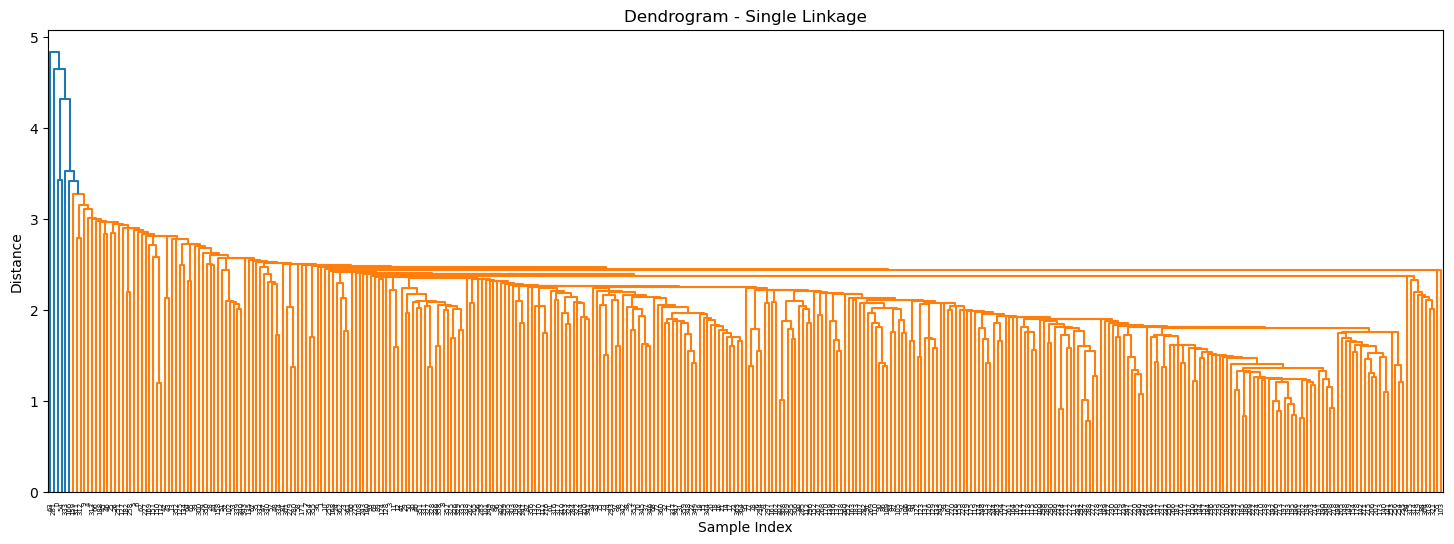

In [11]:
# Create linkage matrix using the 'single' method
# Comparing Madrid and Belgrade 2010 
distance_single = linkage(scaled_2010.loc[:, [
    'MADRID_cloud_cover',
    'MADRID_wind_speed',
    'MADRID_humidity',
    'MADRID_pressure',
    'MADRID_global_radiation',
    'MADRID_precipitation',
    'MADRID_sunshine',
    'MADRID_temp_mean',
    'MADRID_temp_min',
    'MADRID_temp_max',
    'BELGRADE_cloud_cover',
    'BELGRADE_humidity',
    'BELGRADE_pressure',
    'BELGRADE_global_radiation',
    'BELGRADE_precipitation',
    'BELGRADE_sunshine',
    'BELGRADE_temp_mean',
    'BELGRADE_temp_min',
    'BELGRADE_temp_max'
]], method="single") 

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title("Dendrogram - Single Linkage")
plt.show()

##### Merges clusters based on the closest pair of points.

In [12]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_single, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 1
Threshold = 5, Number of clusters = 1
Threshold = 2, Number of clusters = 179
Threshold = 1, Number of clusters = 356


#### **Complete Linkage**

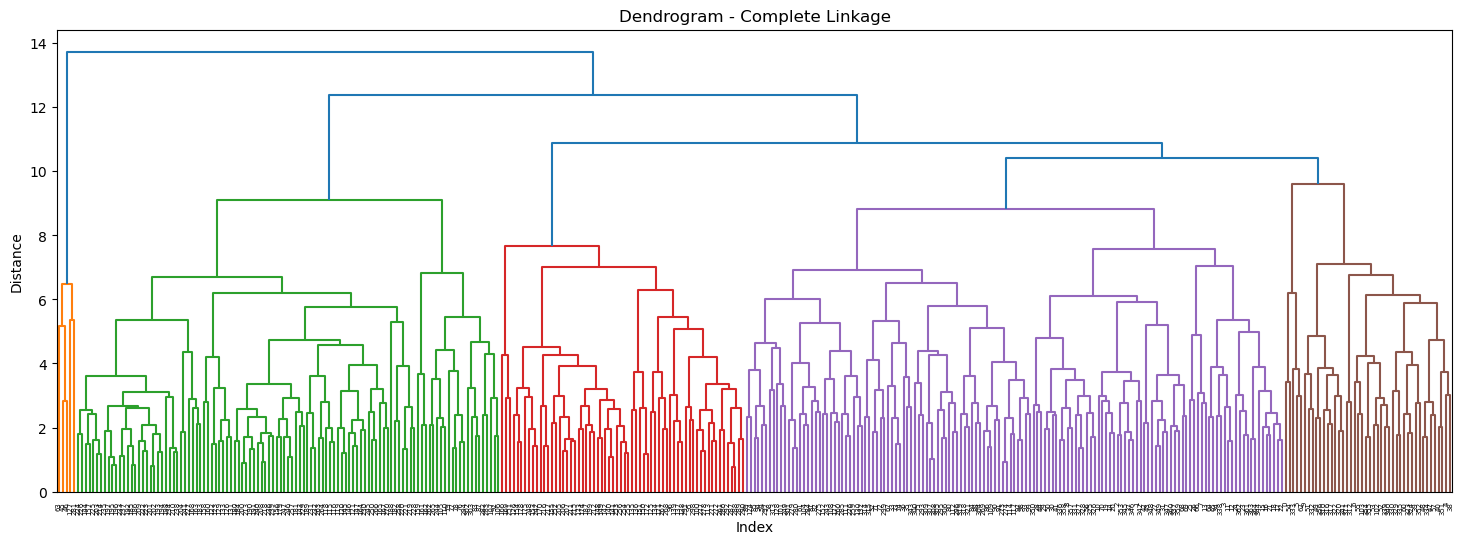

In [13]:
# Create linkage matrix using the 'complete' method
# Comparing Madrid and Belgrade 2010 
distance_complete = linkage(scaled_2010.loc[:, [
    'MADRID_cloud_cover',
    'MADRID_wind_speed',
    'MADRID_humidity',
    'MADRID_pressure',
    'MADRID_global_radiation',
    'MADRID_precipitation',
    'MADRID_sunshine',
    'MADRID_temp_mean',
    'MADRID_temp_min',
    'MADRID_temp_max',
    'BELGRADE_cloud_cover',
    'BELGRADE_humidity',
    'BELGRADE_pressure',
    'BELGRADE_global_radiation',
    'BELGRADE_precipitation',
    'BELGRADE_sunshine',
    'BELGRADE_temp_mean',
    'BELGRADE_temp_min',
    'BELGRADE_temp_max',
]], method="complete")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendrogram - Complete Linkage")
plt.show()

##### Uses farthest pair of points between clusters.

In [14]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_complete, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 5
Threshold = 5, Number of clusters = 41
Threshold = 2, Number of clusters = 256
Threshold = 1, Number of clusters = 358


#### **Average Linkage**

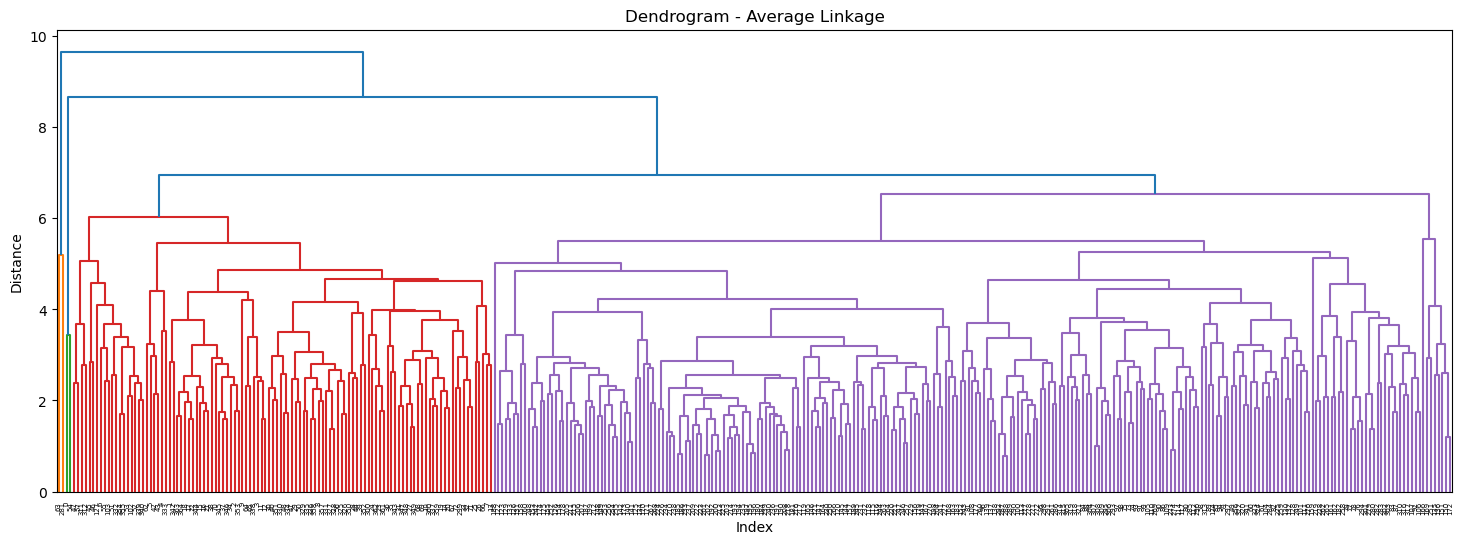

In [15]:
# Create linkage matrix using the 'average' method
# Comparing Madrid and Belgrade 2010 
distance_average = linkage(scaled_2010.loc[:, [
    'MADRID_cloud_cover',
    'MADRID_wind_speed',
    'MADRID_humidity',
    'MADRID_pressure',
    'MADRID_global_radiation',
    'MADRID_precipitation',
    'MADRID_sunshine',
    'MADRID_temp_mean',
    'MADRID_temp_min',
    'MADRID_temp_max',
    'BELGRADE_cloud_cover',
    'BELGRADE_humidity',
    'BELGRADE_pressure',
    'BELGRADE_global_radiation',
    'BELGRADE_precipitation',
    'BELGRADE_sunshine',
    'BELGRADE_temp_mean',
    'BELGRADE_temp_min',
    'BELGRADE_temp_max',
]], method="average")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendrogram - Average Linkage")
plt.show()

##### Considers the average distance between all points in each cluster.

In [16]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_average, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 1
Threshold = 5, Number of clusters = 14
Threshold = 2, Number of clusters = 242
Threshold = 1, Number of clusters = 358


#### **Ward Method**

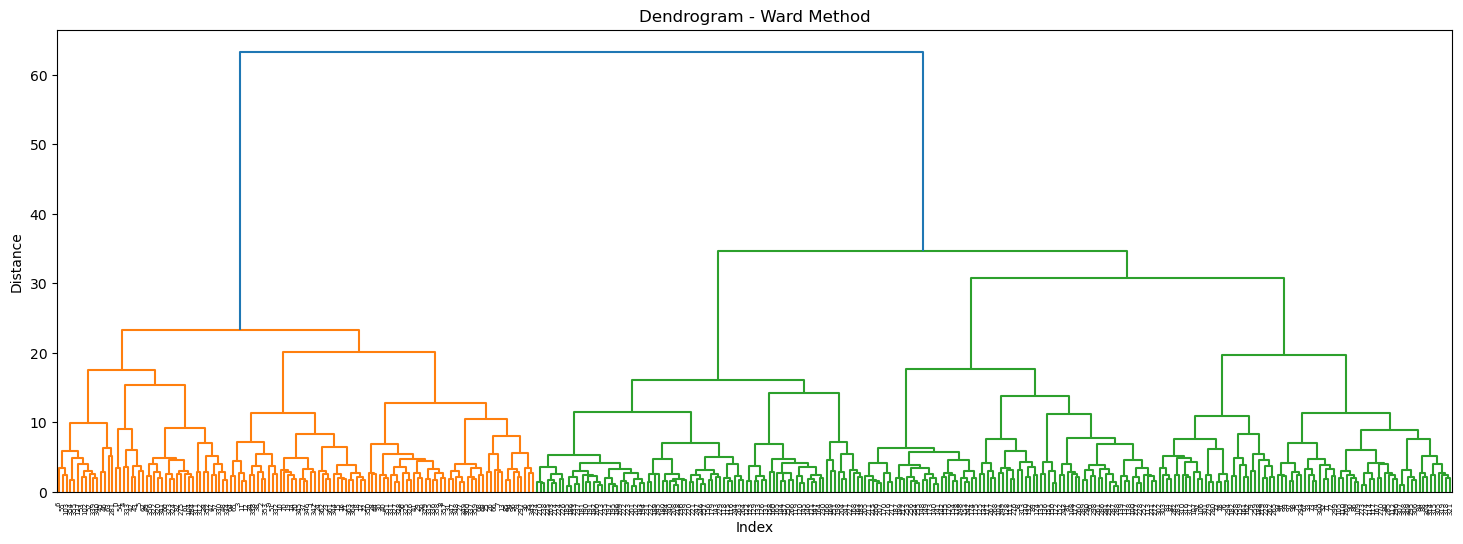

In [17]:
# Create linkage matrix using the 'ward' method
# Comparing Madrid and Belgrade 2010 
distance_ward = linkage(scaled_2010.loc[:, [
    'MADRID_cloud_cover',
    'MADRID_wind_speed',
    'MADRID_humidity',
    'MADRID_pressure',
    'MADRID_global_radiation',
    'MADRID_precipitation',
    'MADRID_sunshine',
    'MADRID_temp_mean',
    'MADRID_temp_min',
    'MADRID_temp_max',
    'BELGRADE_cloud_cover',
    'BELGRADE_humidity',
    'BELGRADE_pressure',
    'BELGRADE_global_radiation',
    'BELGRADE_precipitation',
    'BELGRADE_sunshine',
    'BELGRADE_temp_mean',
    'BELGRADE_temp_min',
    'BELGRADE_temp_max',
]], method="ward")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendrogram - Ward Method")
plt.show()

##### Minimises the variance between clusters by reducing the sum of squares within clusters. 

In [18]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_ward, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 20
Threshold = 5, Number of clusters = 59
Threshold = 2, Number of clusters = 261
Threshold = 1, Number of clusters = 358


### **Unscaled Data**

#### **Single Linkage**

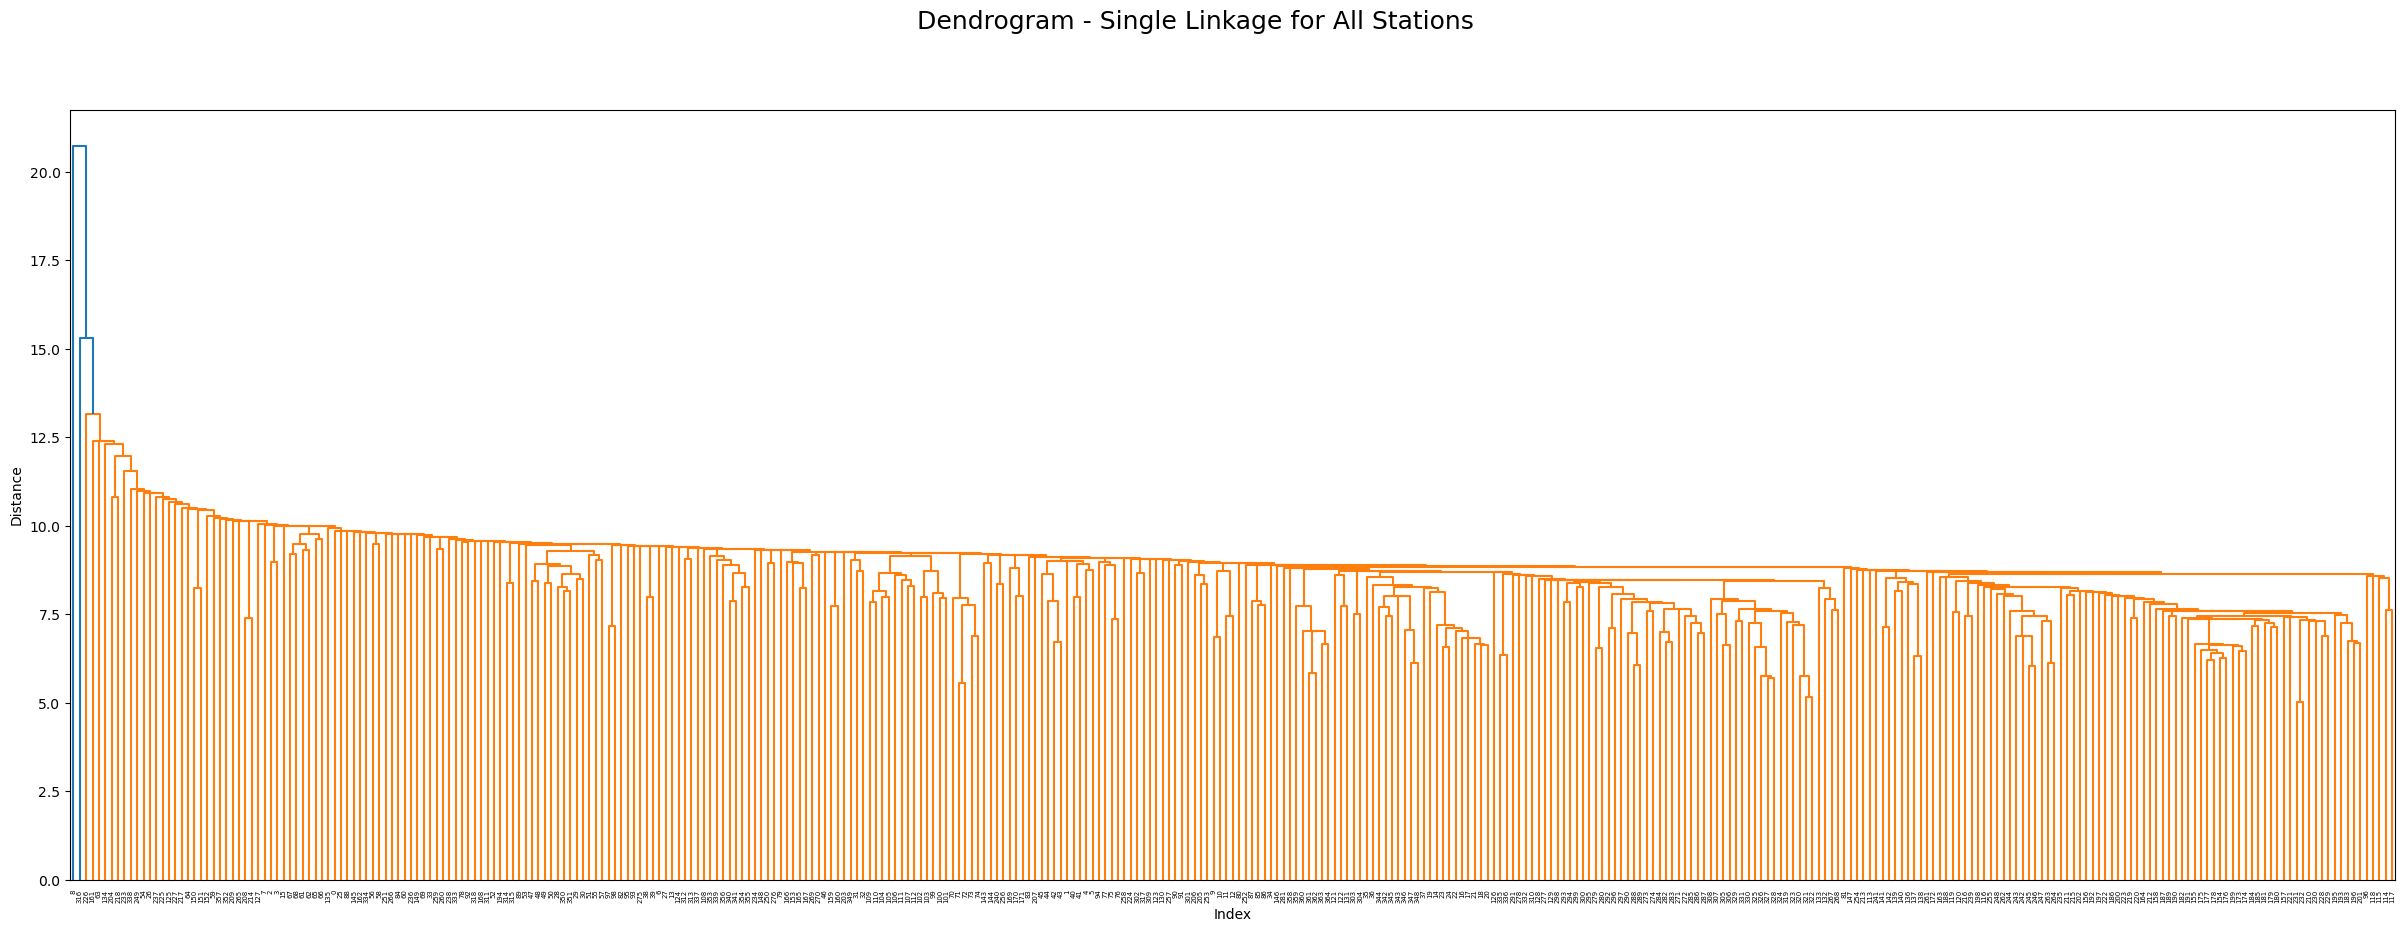

In [19]:
# Create linkage matrix using the 'single' method
# Comparing all weather stations in 2010
distance_single = linkage(scaled_2010.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="single")

# Plot the dendrogram
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram - Single Linkage for All Stations",fontsize=18)
plt.show()

In [20]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_single, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 31
Threshold = 5, Number of clusters = 365
Threshold = 2, Number of clusters = 365
Threshold = 1, Number of clusters = 365


#### **Complete Linkage**

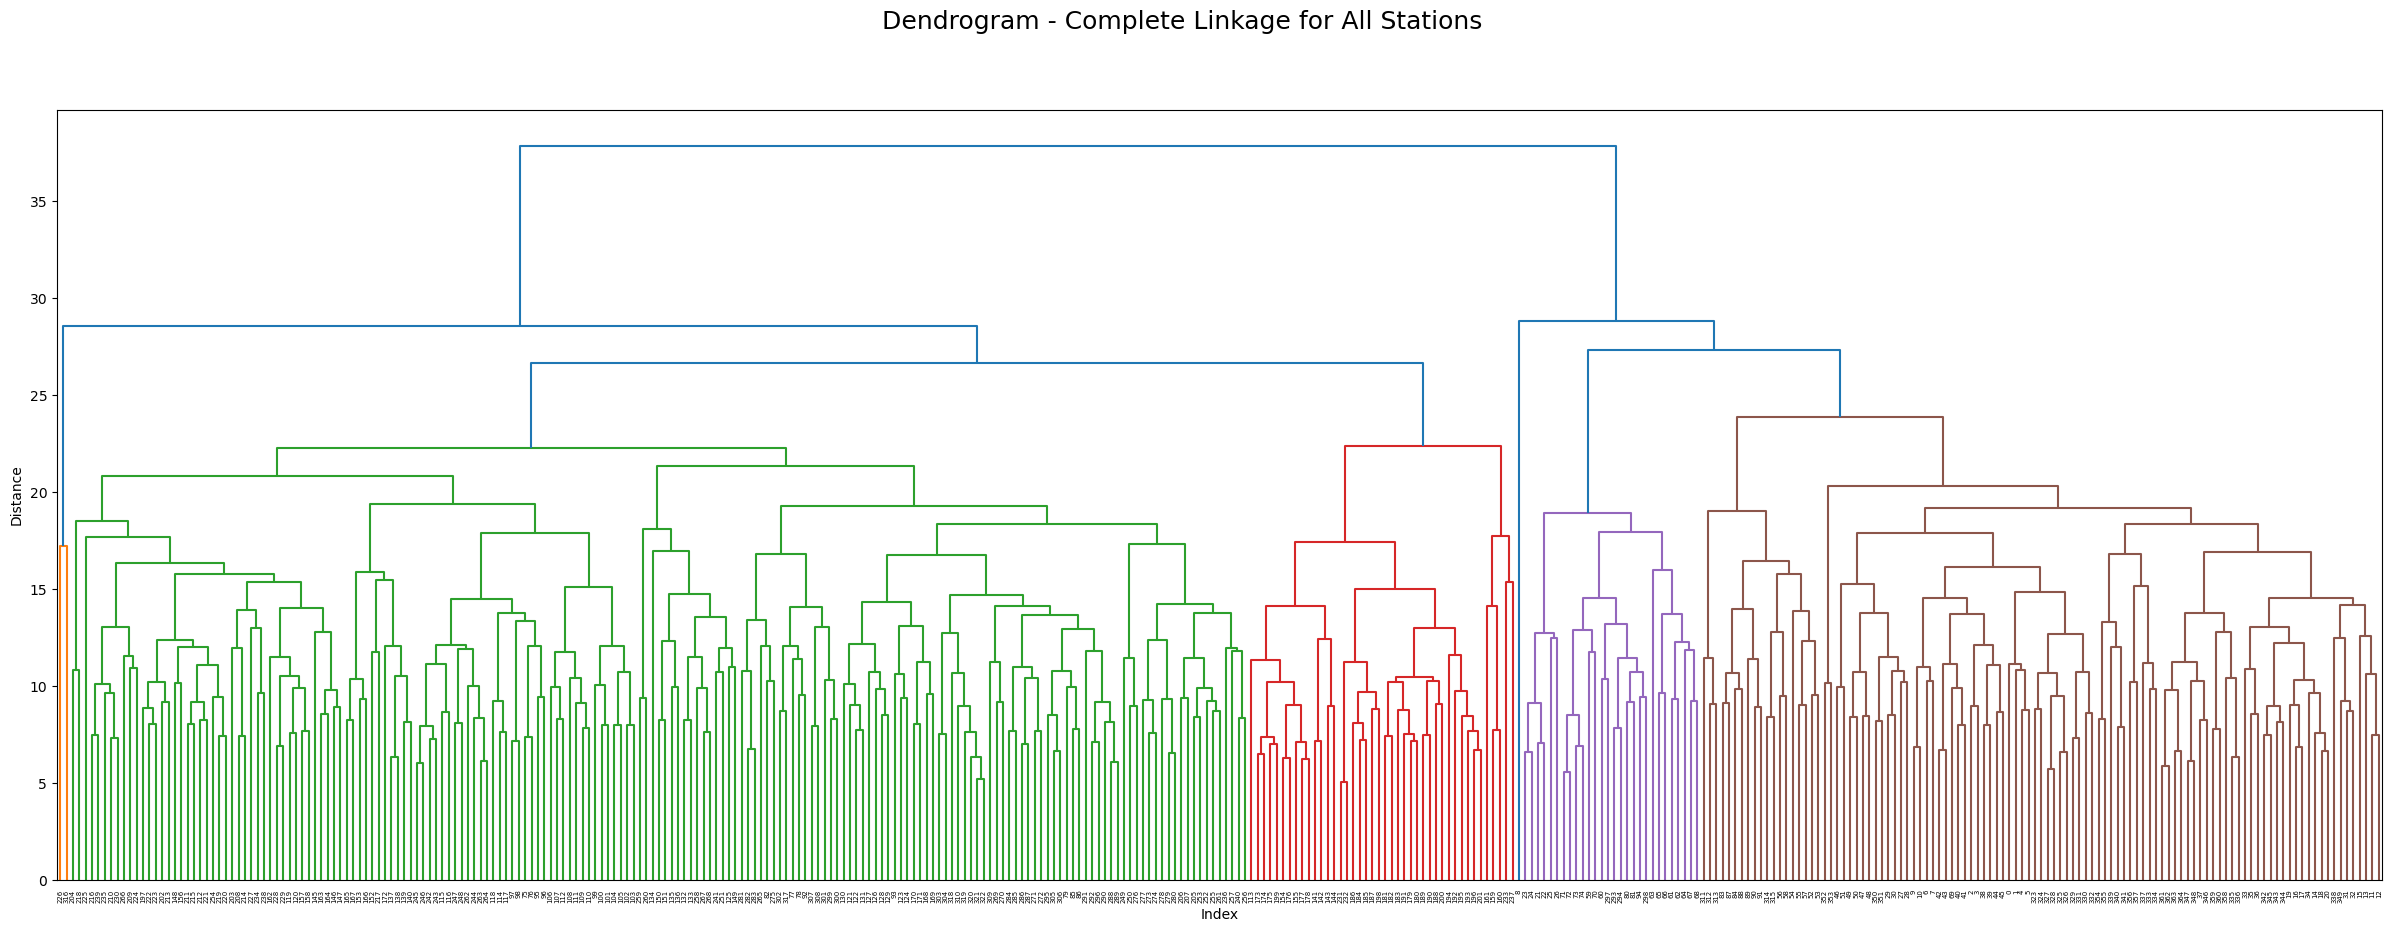

In [21]:
# Create linkage matrix using the 'complete' method
# Comparing all weather stations in 2010
distance_complete = linkage(scaled_2010.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="complete")

# Plot the dendrogram
plt.figure(figsize=(30,10))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram - Complete Linkage for All Stations",fontsize=18)
plt.show()

In [22]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_complete, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 189
Threshold = 5, Number of clusters = 365
Threshold = 2, Number of clusters = 365
Threshold = 1, Number of clusters = 365


#### **Average Linkage**

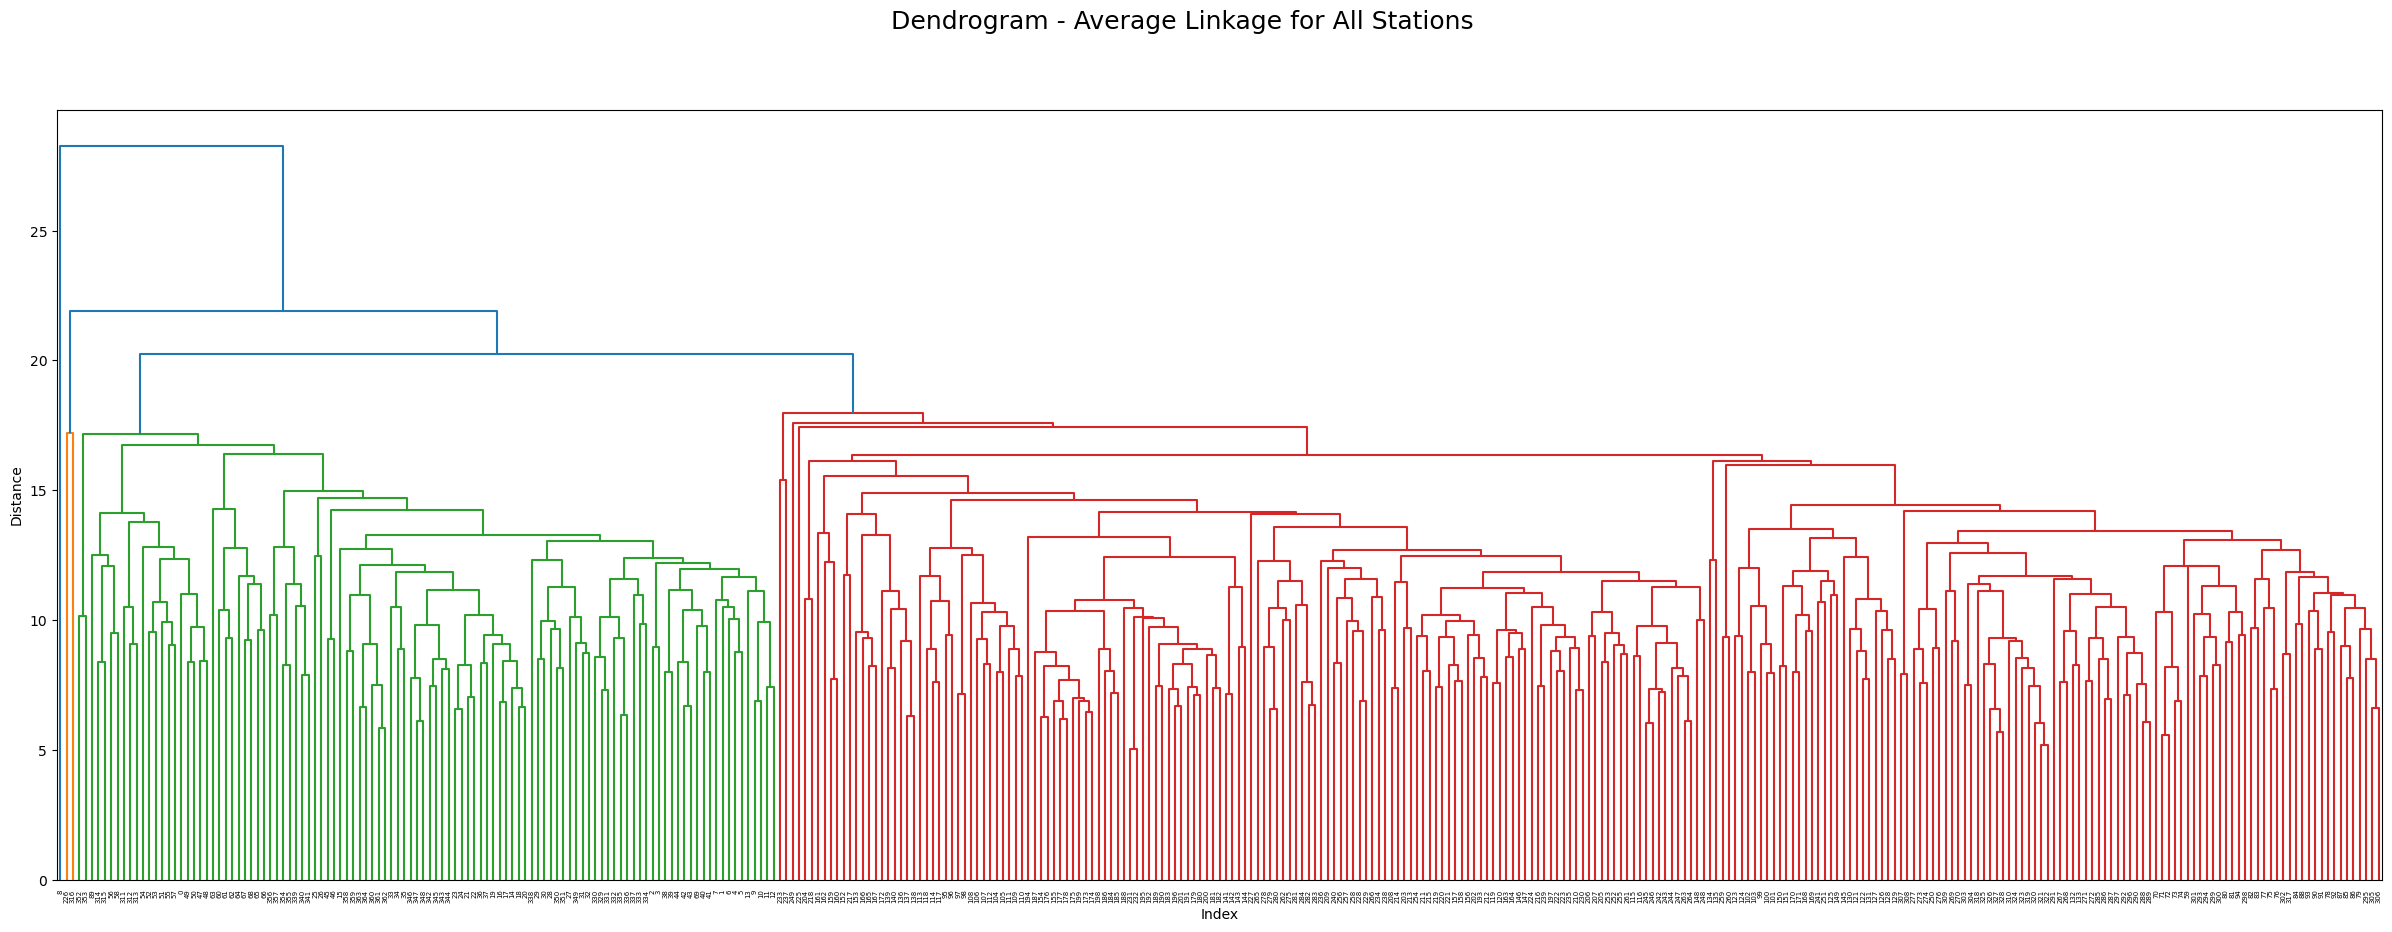

In [23]:
# Create linkage matrix using the 'average' method
# Comparing all weather stations in 2010
distance_average = linkage(scaled_2010.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="average")


# Plot the dendrogram
plt.figure(figsize=(30,10))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram - Average Linkage for All Stations",fontsize=18)
plt.show()

In [24]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_average, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 157
Threshold = 5, Number of clusters = 365
Threshold = 2, Number of clusters = 365
Threshold = 1, Number of clusters = 365


#### **Ward Method**

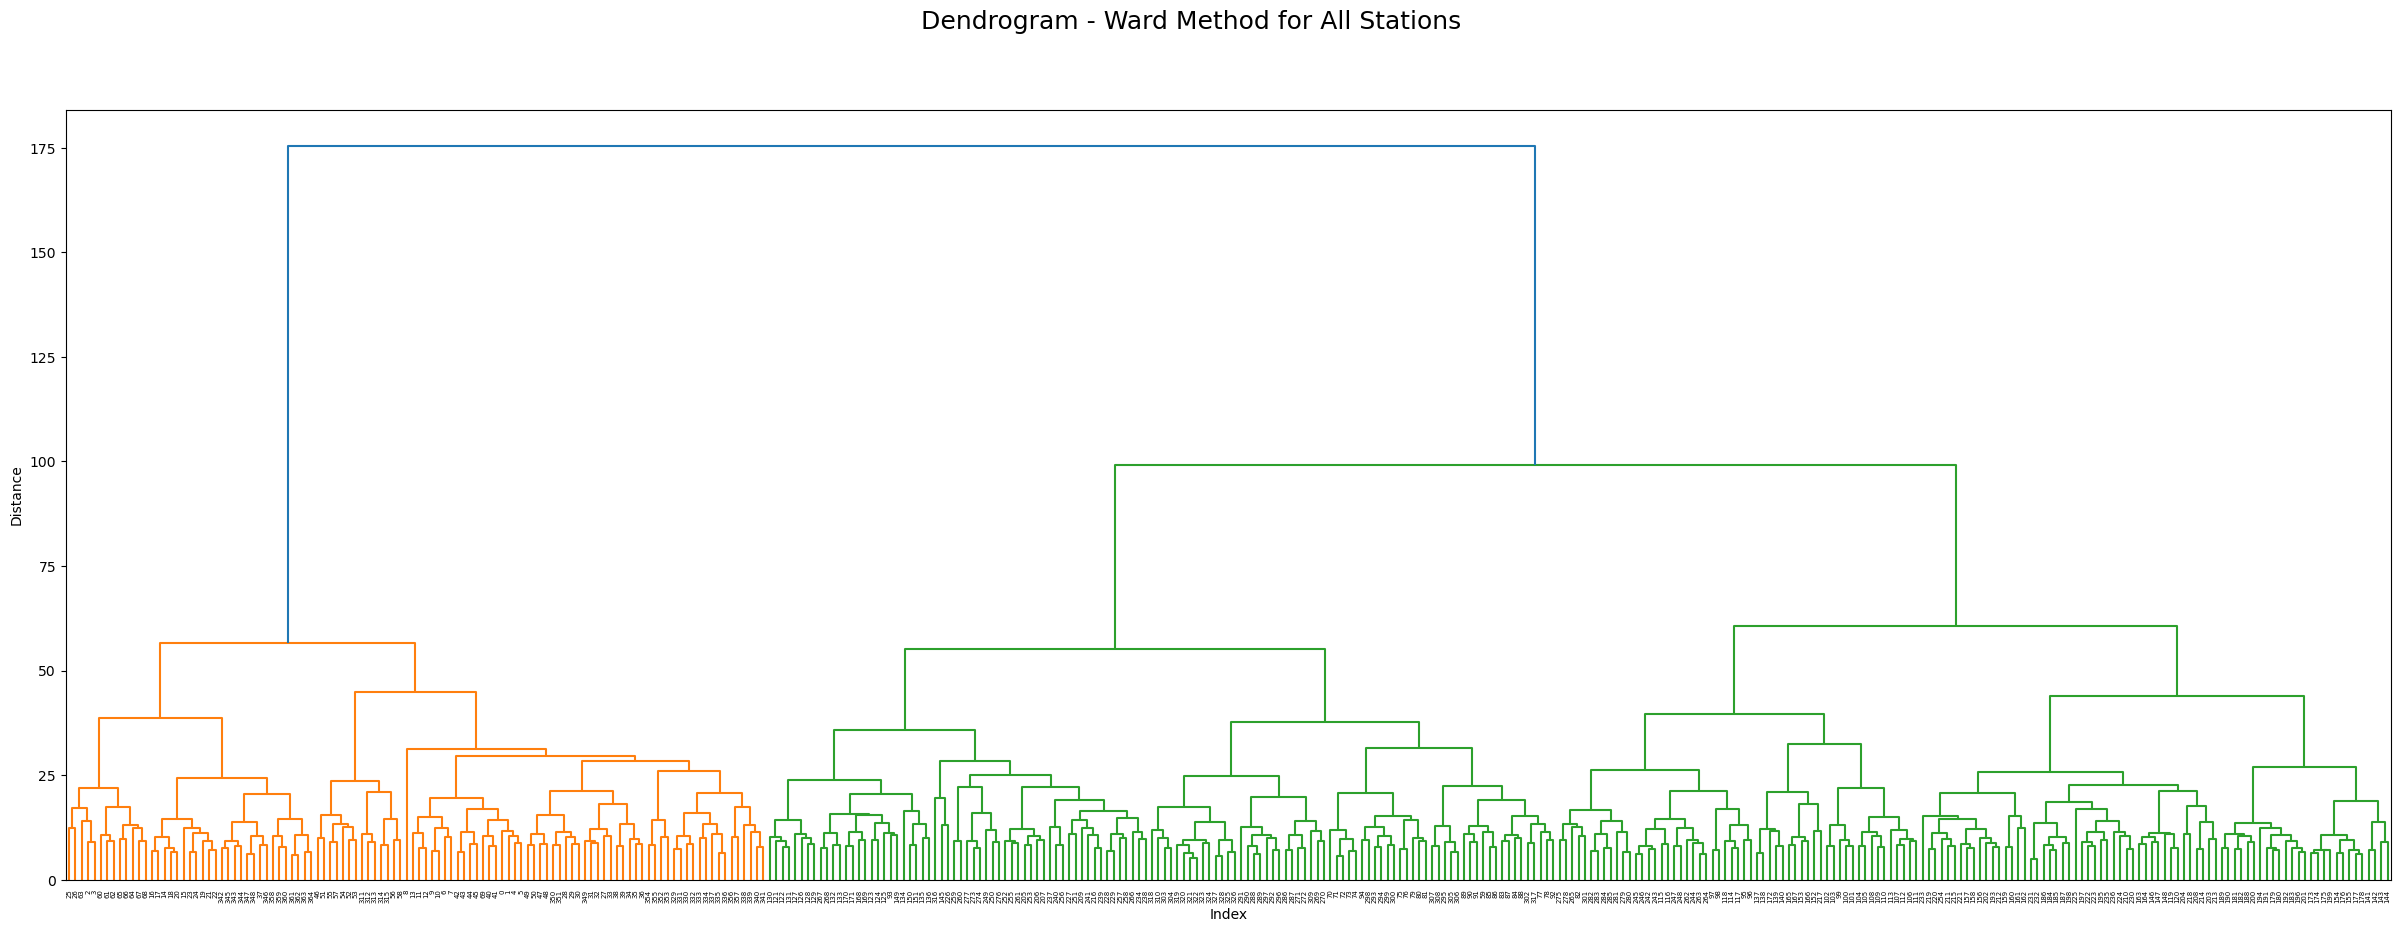

In [25]:
# Create linkage matrix using the 'ward' method
# Comparing all weather stations in 2010
distance_ward = linkage(scaled_2010.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="ward")

# Plot the dendrogram
plt.figure(figsize=(30,10))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram - Ward Method for All Stations",fontsize=18)
plt.show()

In [26]:
# Count the number of clusters
for threshold in [10, 5, 2, 1]:
    clusters = fcluster(distance_ward, t=threshold, criterion='distance')
    print(f"Threshold = {threshold}, Number of clusters = {len(set(clusters))}")

Threshold = 10, Number of clusters = 197
Threshold = 5, Number of clusters = 365
Threshold = 2, Number of clusters = 365
Threshold = 1, Number of clusters = 365


## 6. Principal Components Analysis (PCA)

In this step, I applied Principal Components Analysis (PCA) to the 2010 scaled weather dataset to reduce its dimensionality while preserving the most important climatic patterns. I selected weather-related features across multiple European stations, including temperature, precipitation, cloud cover, and other variables. The PCA was run with 30 components, which capture the majority of the variance in the dataset. The resulting principal components were saved to a new DataFrame and exported as a CSV file, creating a reduced dataset suitable for clustering and further analysis.

In [27]:
# Select relevant weather-related features from multiple European stations for PCA analysis
# These include variables like temperature, precipitation, etc. 
# and will be used to reduce dimensionality while preserving important climatic patterns
cols = ['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'
]
df1 = scaled_2010[cols]
df1

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1.008562,0.777128,1.509940,-2.381145,-1.162037,0.681868,-0.360027,-0.933688,-0.877406,-0.872786,...,-2.826720,-0.171783,-0.274248,-0.979632,-0.139324,3.469447e-18,0.611279,-2.789164,-2.461020,-1.753796
1,-1.403792,1.717261,-0.140925,0.563135,-0.743904,-0.471125,-0.022212,0.262330,-1.424933,-1.439504,...,-2.826720,0.158222,0.621747,-0.955551,-0.139324,3.469447e-18,0.611279,-3.112718,-3.355223,-1.496136
2,-1.403792,-0.028701,-0.054037,0.989281,-0.712544,-0.471125,-0.360027,0.515334,-1.636477,-1.694528,...,-0.659172,-1.656806,0.621747,-1.063915,-0.051988,3.469447e-18,-0.951711,-3.220569,-3.231884,-1.732324
3,-0.438850,-0.968834,0.641064,0.253211,-0.848437,-0.471125,-0.360027,-0.082675,-1.848022,-2.020391,...,-2.104204,-2.316816,0.896519,-0.919430,-0.030686,3.469447e-18,0.788892,-2.070155,-1.566818,-2.011456
4,0.526092,-0.431615,0.206626,-0.986486,-0.796171,-0.388769,-0.360027,0.078327,-1.736027,-1.850375,...,-0.659172,-0.501789,-0.322035,-0.955551,-0.120153,3.469447e-18,0.149486,-2.573461,-2.183509,-1.667909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.526092,-0.297310,0.380401,1.454167,-0.879797,-0.471125,4.707193,-0.473681,-1.984903,-2.374590,...,0.063344,0.158222,-0.023370,-1.352886,-0.051988,3.469447e-18,-0.312306,0.446377,0.468263,-0.229306
361,1.008562,1.045737,0.901727,0.989281,-1.120223,-0.306412,4.031564,-0.933688,-1.462264,-1.382832,...,0.063344,0.158222,-0.023370,-1.352886,-0.051988,3.469447e-18,-0.312306,0.446377,0.468263,-0.293721
362,1.008562,-0.163005,1.857491,1.066762,-1.141130,-0.471125,3.693749,-0.933688,-1.151170,-0.858618,...,0.063344,0.158222,-0.023370,-1.244522,-0.051988,3.469447e-18,-0.312306,0.446377,0.468263,-0.379608
363,1.008562,-0.968834,2.118154,1.195897,-1.214303,-0.471125,2.342490,-0.933688,-1.238276,-0.901121,...,0.063344,0.158222,-0.023370,-1.208401,-0.051988,3.469447e-18,-0.312306,0.446377,0.468263,-0.315193


In [28]:
# Run the PCA model, reducing to 30 components 
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(df1)
principalComponents 

array([[-10.35071976,  -3.42020991,   2.69448118, ...,   0.41128922,
         -0.22827413,  -0.52223343],
       [-11.40110579,   2.14378704,   1.17554719, ...,   0.24031799,
          1.23739845,   0.20613578],
       [-11.32514305,   5.16353616,  -3.27397729, ...,   0.27715064,
          1.03004385,   0.61002491],
       ...,
       [-10.58018019,   3.32650845,  -0.8085427 , ...,  -0.46785959,
         -0.01683433,   0.69064108],
       [-10.51438604,   4.97601874,  -1.92077154, ...,  -1.10824057,
         -1.10392103,  -0.51409861],
       [-10.9736921 ,   2.86928588,  -2.0887048 , ...,  -1.13767867,
         -0.63058669,   0.45877777]])

In [29]:
# Make a dataframe of the new components
df_PCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18', 'PCA19', 'PCA20', 'PCA21', 'PCA22', 'PCA23', 'PCA24', 'PCA25', 'PCA26', 'PCA27', 'PCA28', 'PCA29', 'PCA30'])
df_PCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30
0,-10.350720,-3.420210,2.694481,-4.907945,-0.615270,-0.117793,-0.380163,0.204613,-3.219977,-1.458297,...,-1.999826,0.639199,-0.644769,0.232145,-1.752768,0.833051,-0.486775,0.411289,-0.228274,-0.522233
1,-11.401106,2.143787,1.175547,-1.047558,0.480527,0.150198,-0.519505,-0.065881,-3.694651,0.137323,...,-1.632181,-0.410145,-1.638863,1.648128,-1.743907,0.423925,-0.821994,0.240318,1.237398,0.206136
2,-11.325143,5.163536,-3.273977,0.302211,0.740460,-1.595493,-1.100995,0.380620,-2.164505,0.403377,...,-1.727330,0.844856,-1.124272,-0.363256,0.065551,0.030805,-0.219237,0.277151,1.030044,0.610025
3,-12.031747,3.520175,-3.119572,-1.180872,-0.258580,-3.556305,1.086317,1.379936,-2.632509,0.951803,...,-0.597386,-0.310788,1.194199,0.083898,0.429754,0.817476,0.141599,-0.558395,0.319805,-0.363056
4,-13.064564,0.325910,-0.179326,-2.587370,-1.815074,0.574062,0.553366,-0.672353,-1.943700,-0.336893,...,0.317753,0.411422,-0.963565,-0.044373,-0.005221,0.448820,0.430112,0.374916,-0.020747,1.681601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-11.860731,4.462048,-1.976918,3.740002,0.054545,0.595432,-2.623222,-0.510574,3.328890,-0.210453,...,0.692807,-0.142985,-0.131437,0.073999,-1.557584,-0.078265,-0.013535,1.221104,0.347017,0.765947
361,-11.145941,3.573945,-1.678549,3.792240,-1.446693,-0.125670,0.065896,-0.492483,3.227491,-0.323767,...,0.771787,-0.823944,-0.420485,-0.428825,-1.121793,1.129996,-1.254077,-0.902571,0.642211,0.416346
362,-10.580180,3.326508,-0.808543,5.101335,-1.982922,-1.053730,-0.959879,-0.053266,2.737411,-0.712671,...,-0.031040,-0.088461,-0.592462,-0.933647,-0.476157,0.834715,-1.644596,-0.467860,-0.016834,0.690641
363,-10.514386,4.976019,-1.920772,4.087290,-3.320282,-1.109630,-0.150379,0.430146,2.035604,1.080389,...,-0.391741,0.909721,0.209683,-0.967782,0.590697,-0.216940,-0.246264,-1.108241,-1.103921,-0.514099


In [30]:
# Check how much variance the 30 components are capturing
print(np.sum(pca.explained_variance_ratio_))  # Should be close to 1

0.8786054367790539


In [31]:
# Export to CSV
df_PCA.to_csv(os.path.join(path, 'Achievement 2', '2.1', '2010_PCA.csv'), index=False)